<a href="https://colab.research.google.com/github/y001003/Bootcamp/blob/main/Section1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [14]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/BootCamp/Section1_Project/vgames2.csv'
df = pd.read_csv(path)

df = df.iloc[:,1:]
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [15]:
# 전처리_ Sales 값의 단위 통일(M : 삭제, K : /1000)
sales = df.loc[:,'NA_Sales':'Other_Sales']

# M, K 값 포함 index 찾아서 변환
def string_replace_float(x) :
  # find()에서 포함되어있지 않으면 -1값이 나온다.
  # if 값이 -1이 아닌경우 찾는 값이 포함되어 있다는 뜻
  if str(x).find("K") != -1 :
    x = str(x).replace("K",'')
    return float(x) / 1000

  if str(x).find("M") != -1 :
    x = str(x).replace("M",'')
    return float(x)

  return float(x)

sales['NA_Sales'] = sales['NA_Sales'].apply(string_replace_float)
sales['EU_Sales'] = sales['EU_Sales'].apply(string_replace_float)
sales['JP_Sales'] = sales['JP_Sales'].apply(string_replace_float)
sales['Other_Sales'] = sales['Other_Sales'].apply(string_replace_float)

df.loc[:,'NA_Sales':'Other_Sales'] = sales
df.dtypes
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [16]:
# 전처리_결측값 처리
print("변경 전 결측치 \n",df.isnull().sum())

# Year 결측치는 0 : unkown으로 대체
df['Year'] = df['Year'].fillna(0)
# Genre 결측치는 Misc으로 변경
df['Genre'] = df['Genre'].fillna('Unknown')
# Publisher 결측치는 Unkown으로 대체
df['Publisher'] = df['Publisher'].fillna('Unknown')

print("변경 후 결측치 \n",df.isnull().sum())

변경 전 결측치 
 Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64
변경 후 결측치 
 Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


In [23]:
# 결측치 변경 타당성 검토
sum = df.loc[:,'NA_Sales':'Other_Sales'].sum()

# Year에 대하여
year_0 = df.loc[:,'NA_Sales':'Other_Sales'].loc[df['Year'] == 0].sum()
print("Year 0이 차지하는 정도 \n",year_0 / sum)
print("연도별 트렌드의 흐름을 파악하는데 있어서 크리티컬한 볼륨을 가진 데이터가 아니다")
print("약 1%정도의 데이터를 가지고 트렌드가 변화가 아주 유의미하다고 보기 힘들다.\n")

# Genre에 대하여
Unknown_g = df.loc[:,'NA_Sales':'Other_Sales'].loc[df['Genre'] == 'Unknown'].sum()
print("Unknown 이 차지하는 정도 \n", Unknown_g / sum)
print("지역별 가장 선호하는 장르를 파악하는 데이터 분석에 있어서 크리티컬한 볼륨을 가진 데이터가 아니다.\n")

# Publisher에 대하여
Unknown_p = df.loc[:,'NA_Sales':'Other_Sales'].loc[df['Publisher'] == 'Unknown'].sum()
print("Unknown 이 차지하는 정도 \n", Unknown_p / sum)
print("데이터 분석에 있어서 크리티컬한 볼륨을 가진 데이터가 아니다.\n")

Year 0이 차지하는 정도 
 NA_Sales       0.013563
EU_Sales       0.010291
JP_Sales       0.005360
Other_Sales    0.010968
dtype: float64
연도별 트렌드의 흐름을 파악하는데 있어서 크리티컬한 볼륨을 가진 데이터가 아니다
약 1%정도의 데이터를 가지고 트렌드가 변화가 아주 유의미하다고 보기 힘들다.

Unknown 이 차지하는 정도 
 NA_Sales       0.004692
EU_Sales       0.005390
JP_Sales       0.009977
Other_Sales    0.006945
dtype: float64
지역별 가장 선호하는 장르를 파악하는 데이터 분석에 있어서 크리티컬한 볼륨을 가진 데이터가 아니다.

Unknown 이 차지하는 정도 
 NA_Sales       0.006153
EU_Sales       0.005016
JP_Sales       0.005414
Other_Sales    0.003949
dtype: float64
데이터 분석에 있어서 크리티컬한 볼륨을 가진 데이터가 아니다.







---


문제

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

1. 지역에 따라서 선호하는 게임 장르가 다를까

In [20]:
grouped_genre = df.loc[:,'NA_Sales':'Other_Sales'].groupby(df['Genre']).sum()
grouped_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874.81,522.16,157.90,186.45
Adventure,105.66,64.05,51.95,16.81
Fighting,223.20,101.22,87.34,36.64
Misc,408.05,212.36,105.27,74.04
Platform,446.44,201.61,130.65,51.53
Puzzle,123.35,50.73,56.87,12.52
Racing,357.19,237.10,56.40,77.10
Role-Playing,319.54,183.58,344.95,56.96
Shooter,581.92,313.05,38.28,102.65


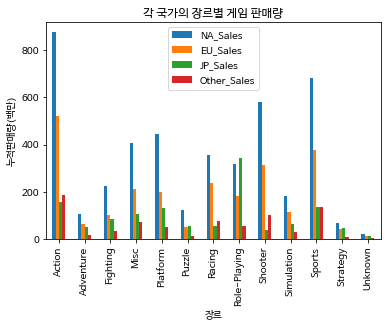

In [26]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

grouped_genre.plot(kind="bar")

plt.title("각 국가의 장르별 게임 판매량")
plt.xlabel("장르")
plt.ylabel("누적판매량(백만)")
plt.show()